# M2177.003100 Deep Learning Assignment #2<br> Part 1. Training Convolutional Neural Networks (Pytorch)

Copyright (C) Data Science & AI Laboratory, Seoul National University. This material is for educational uses only. Some contents are based on the material provided by other paper/book authors and may be copyrighted by them. Written by Jooyoung Choi and Hyeongrok Han 2020

**For understanding of this work, please carefully look at given PDF file.**

Now, you're going to leave behind your implementations and instead migrate to one of popular deep learning frameworks, **PyTorch**. <br>
In this notebook, you will learn how to train convolutional neural networks (CNNs) for classifying images in the CIFAR-10 dataset. <br>
There are **3 sections**, and in each section, you need to follow the instructions to complete the skeleton codes and explain them.

**Note**: certain details are missing or ambiguous on purpose, in order to test your knowledge on the related materials. However, if you really feel that something essential is missing and cannot proceed to the next step, then contact the teaching staff with clear description of your problem.

### Submitting your work:
<font color=red>**DO NOT clear the final outputs**</font> so that TAs can grade both your code and results. 

### Some helpful tutorials and references for assignment #2-1:
- [1] Pytorch official documentation. [[link]](https://pytorch.org/docs/stable/index.html)
- [2] Stanford CS231n lectures. [[link]](http://cs231n.stanford.edu/)
- [3] Szegedy et al., "Going deeper with convolutions", CVPR 2015. [[pdf]](http://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Szegedy_Going_Deeper_With_2015_CVPR_paper.pdf)

## 1. Load datasets
The CIFAR-10 dataset will be downloaded automatically if it is not located in the *data* directory. <br>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=8,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
# function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    print(np.transpose(npimg, (1, 2, 0)).shape)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

(36, 274, 3)


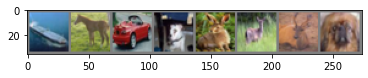


 ship horse   car   dog
torch.Size([3, 32, 32])


In [4]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
# print size of single image
print(images[1].shape)

## 2. Training a small CNN model

#### CNN architecture in order:
* 7x7 Convolutional layer with 8 filters, strides of 1, and ReLU activation
* 2x2 Max pooling layer with strides of 2
* 4x4 Convolutional layer with 16 filters, strides of 1, and ReLU activation
* 2x2 Max pooling layer with strides of 2
* Fully connected layer with 100 output units and ReLU activation
* Fully connected layer with 80 output units and ReLU activation
* Fully connected layer with 10 output units 
* You can use any padding option.

#### Training setup:
* Loss function: Softmax cross entropy
* Optimizer: Gradient descent with 0.001 learning rate
* Batch size: 8
* Training epoch: 2

In [5]:
# Define a CNN model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=8,kernel_size=7,stride=1)
        self.conv2 = nn.Conv2d(in_channels=8,out_channels=16,kernel_size=4,stride=1)
        self.pool = nn.MaxPool2d(2,2)       
        self.fc1 = nn.Linear(16*5*5,100)
        self.fc2 = nn.Linear(100,80)
        self.fc3 = nn.Linear(80,10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [6]:
# Function to train the network

def train(net, trainloader, max_epoch, crit, opt, model_path='./cifar_net.pth'):

    for epoch in range(max_epoch):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
        
            # Training on GPU
            inputs = inputs.to(device)
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = crit(outputs, labels)
            loss.backward()
            opt.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0

    print('Finished Training')
    torch.save(net.state_dict(), model_path)
    print('Saved Trained Model')

In [7]:
PATH = './cifar_net.pth'
epoch = 2

# initialize model
net = Net()

# Training on GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = net.to(device)

# Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

train(net, trainloader, epoch, criterion, optimizer, PATH)

[1,  2000] loss: 2.158
[1,  4000] loss: 1.707
[1,  6000] loss: 1.562
[2,  2000] loss: 1.453
[2,  4000] loss: 1.386
[2,  6000] loss: 1.331
Finished Training
Saved Trained Model


In [8]:
# function to calculate accuracy
def print_accuracy(net, dataloader):
    correct = 0
    total = 0

    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            # Inference on GPU
            images = images.to(device)
            labels = labels.to(device)
        
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
    print('Accuracy of the network on the %d test images: %d %%' % (total,
        100 * correct / total))

In [9]:
# load trained model then test
net.load_state_dict(torch.load(PATH))
print_accuracy(net, testloader)

Accuracy of the network on the 10000 test images: 51 %


## <a name="3-1"></a>3-1. Design an Inception module

In this section, you will implement a little more complex CNN model with an `Inception module`. <br>

![Inception_module](Inception.png)

Using the code provided as guidance, <br>
Define an `inception module`, which is the building block of **Inception model (a.k.a GoogLeNet)**, the winner of ILSVRC14. <br>


#### CNN architecture:
* CNN model consists with stem layer, inception module, and fully connected layer
* Stem layer with
    * conv-pooling-conv-pooling
    * 8 filters for the 9x9 convolutions
    * 3x3 max pooling
* `Inception module` with 
    * 3(or 4) main convolutions (blue blocks in the Figure(a))
    * 3 dimensionality reduction convolutions (yellow blocks in the Figure(a))
    * 3x3 max pooling block (red blocks in the Figure(a))
    * Batch Nomalization and ReLU activation after all conv layer
* Fully connected layer with 10 output units and linear activation
* Choose the proper padding option on your own.


In [16]:
'''
About parameter
in_planes : # of input channel
n1xn1 : # of output channel for first branch
n3xn3_blue : # of output channel for second branch's 1x1 conv layer
n3xn3 : # of output channel for second branch
n5xn5_blue : # of output channel for third branch's 1x1 conv layer
n5xn5 : # of output channel for third branch
pool_planes : # of output channel for fourth branch

'''
class Inception(nn.Module):
    def __init__(self, in_planes, n1x1, n3x3_blue, n3x3, n5x5_blue, n5x5, pool_planes):
        super(Inception, self).__init__()
        ##############################################################################
        #                          IMPLEMENT YOUR CODE                               #
        ##############################################################################
        # 1x1 conv branch
        self.b1 = nn.Sequential(
            nn.Conv2d(in_planes, n1x1, kernel_size=1),
            nn.BatchNorm2d(n1x1),
            nn.ReLU(True),
        )

        # 1x1 conv -> 3x3 conv branch
        self.b2 = nn.Sequential(
            nn.Conv2d(in_planes, n3x3_blue, kernel_size=1),
            nn.BatchNorm2d(n3x3_blue),
            nn.ReLU(True),
            nn.Conv2d(n3x3_blue, n3x3, kernel_size=3, padding=1),
            nn.BatchNorm2d(n3x3),
            nn.ReLU(True),
        )

        # 1x1 conv -> 5x5 conv branch
        self.b3 = nn.Sequential(
            nn.Conv2d(in_planes, n5x5_blue, kernel_size=1),
            nn.BatchNorm2d(n5x5_blue),
            nn.ReLU(True),
            nn.Conv2d(n5x5_blue, n5x5, kernel_size=5, padding=2),
            nn.BatchNorm2d(n5x5),
            nn.ReLU(True),
            nn.Conv2d(n5x5, n5x5, kernel_size=5, padding=2),
            nn.BatchNorm2d(n5x5),
            nn.ReLU(True),
        )

        # 3x3 pool -> 1x1 conv branch
        self.b4 = nn.Sequential(
            nn.MaxPool2d(3, stride=1, padding=1),
            nn.Conv2d(in_planes, pool_planes, kernel_size=1),
            nn.BatchNorm2d(pool_planes),
            nn.ReLU(True),
        )
        
        ##############################################################################
        #                          END OF YOUR CODE                                  #
        ##############################################################################
    def forward(self, x):
        y1 = self.b1(x)
        y2 = self.b2(x)
        y3 = self.b3(x)
        y4 = self.b4(x)
        return torch.cat([y1,y2,y3,y4], 1)

## <a name="3-2"></a>3-2. Design a better model on CIFAR-10

Now it's your job to experiment with CNNs to train a model that achieves **<font color=red>>= 70% accuracy on the validation set</font>** of CIFAR-10. <br> You can reuse the implemented functions from above.

### Things you can try to change:
- Filter size
- Number of filters
- Pooling vs Strided Convolution
- Network architectures
- Optimizers
- Activation functions
- Regularizations
- Model ensembles
- Data augmentation
- learning rate scheduler

In [17]:
# Define a CNN model
class BetterNet(nn.Module):
    def __init__(self):
        super(BetterNet, self).__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=64,kernel_size=7,stride=1,padding=3),
            nn.ReLU(True),
            nn.MaxPool2d(3,2,1)
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=64,out_channels=64,kernel_size=1,stride=1),
            nn.ReLU(True),
            nn.Conv2d(in_channels=64,out_channels=192,kernel_size=3,stride=1,padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(3,2,1)
        )
        self.incep_block1 = nn.Sequential(
            Inception(192,64,96,128,16,32,32),
            Inception(256,128,128,192,32,96,64),
            nn.MaxPool2d(3,2,1)
        )        
        self.incep_block2 = nn.Sequential(
            Inception(480,192,96,208,16,48,64),
            Inception(512,160,112,224,24,64,64),
            Inception(512,128,128,256,24,64,64),
            Inception(512,112,144,288,32,64,64),
            Inception(528,256,160,320,32,128,128),
            nn.MaxPool2d(3,2,1)
        )        
        self.incep_block3 = nn.Sequential(
            Inception(832,256,160,320,32,128,128),
            Inception(832,384,192,384,48,128,128),
            nn.AvgPool2d(kernel_size=2)
        )        
        self.fc_block = nn.Sequential(
            nn.Linear(1024,256),
            nn.ReLU(True),
            nn.Linear(256,64),
            nn.ReLU(True),
            nn.Linear(64,10)
        )

    def forward(self, x):
        x=self.block1(x)
        x=self.block2(x)
        x=self.incep_block1(x)
        x=self.incep_block2(x)
        x=self.incep_block3(x)
        x = x.view(-1,1024)
        x=self.fc_block(x)
        out=x
        return out


In [19]:
# initialize model
betternet = BetterNet()
betternet = betternet.to(device)

# Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(betternet.parameters(), lr=0.001, momentum=0.9)

PATH = './better_net.pth'
# Train
train(betternet, trainloader, 10, criterion, optimizer, PATH)
# Test
betternet.load_state_dict(torch.load(PATH))
print_accuracy(betternet, testloader)

[1,  2000] loss: 1.964
[1,  4000] loss: 1.616
[1,  6000] loss: 1.423
[2,  2000] loss: 1.256
[2,  4000] loss: 1.149
[2,  6000] loss: 1.093
[3,  2000] loss: 0.959
[3,  4000] loss: 0.918
[3,  6000] loss: 0.890
[4,  2000] loss: 0.771
[4,  4000] loss: 0.761
[4,  6000] loss: 0.748
[5,  2000] loss: 0.656
[5,  4000] loss: 0.656
[5,  6000] loss: 0.628
[6,  2000] loss: 0.549
[6,  4000] loss: 0.554
[6,  6000] loss: 0.556
[7,  2000] loss: 0.465
[7,  4000] loss: 0.484
[7,  6000] loss: 0.483
[8,  2000] loss: 0.400
[8,  4000] loss: 0.416
[8,  6000] loss: 0.434
[9,  2000] loss: 0.334
[9,  4000] loss: 0.365
[9,  6000] loss: 0.382
[10,  2000] loss: 0.285
[10,  4000] loss: 0.327
[10,  6000] loss: 0.334
Finished Training
Saved Trained Model
Accuracy of the network on the 10000 test images: 78 %


### Describe what you did here
In this cell you should also write an explanation of what you did, any additional features that you implemented, and any visualizations or graphs that you make in the process of training and evaluating your network.

You can write in Korean

_Tell us here_

## BetterNet Architecture
Szegedy et al.의 Going Deeper with Convolutions의 Architecture를 본따서 우리의 데이터 사이즈에 맞게 channel 숫자 및 pooling layer의 kernel size를 조절해서 BetterNet을 만들었습니다.   

***
### block 1 : convolutional layer
<br>
GoogLeNet architecture의 도입부와 비슷하게 첫 번째 block은(위 코드에서 nn.Sequential로 묶인 block1) 7x7 kernel으로 stride = 1, padding = 3의 64개의 filter를 가지는 convolutional layer 와 ReLU activation과 3X3, stride = 2의 MaxPool layer으로 구성되어있습니다.   
GoogLeNet은 7X7 convolutional layer에서 stride = 2를 사용했지만 GoogLeNet의 dataset보다 우리의 CIFAR10 dataset의 image size가 훨씬 작기 때문에 바로 size를 너무 줄이고 싶지 않아서 stride = 1을 사용한 점에서 차이가 있습니다.   
<br><br>
<center><b>32x32x3 -> |block1| -> 16x16x64</b></center>

***
### block 2 : convolutional layer
<br>
두 번째 block 역시 GoogLeNet처럼 1X1 convolutional layer(with 64 channels)을 거친 후 ReLU activation, 3X3 kernel으로 stride=1, padding=1의 192개의 filter를 가지는 convolutional layer이후 ReLU actiavtion 을 통과시켰습니다. 
그리고 마지막으로 3X3, stride = 2의 MaxPool layer으로 구성되어있습니다. 마지막의 MaxPool layer를 통과한 후 8x8x192 가 됩니다.
<br><br>
<center><b>32x32x3 -> |block1| -> 16x16x64 -> |block2| -> 8x8x192</b></center>

***
### block 3 : inception block1
<br>
block3은 2개의 inception layer와 MaxPooling layer로 구성되어있습니다. 
첫 번째 inception layer는 64개의 filter를 가진 1x1 convolution layer + 96개 filter의 1x1 convolution layer로 reduction 한 후 128개 filter 의 3x3 kernel convolutional layer + 16개 filter의 1x1 convolution layer로 reduction 한 후 32개 filter 의 5x5 kernel convolutional layer, max pooling 후 32개의 1x1 convolutional layer로 구성되어있습니다. <br>
첫 번째 inception layer를 통과한 후 8x8x256이 됩니다. (64+128+32+32 = 256)<br>
그 후 두 번째 inception layer를 통과하는데, (1x1 convolution layer, 3x3 전의 reduction layer, 3x3 layer, 5x5 전의 reduction layer, 5x5 layer, pooling layer)의 filter 수 = (256,128,128,192,32,96,64)로 구성하였습니다.<br>
두 번째 inception layer를 통과한 후 8x8x480 (128+192+96+64=480)이 됩니다.
그리고 마지막으로 3x3, stride=2, padding=1의 MaxPool layer를 통과해서 4x4x480이 됩니다.
(각 layer의 filter 수는 논문에서 사용한 값을 우선 그대로 차용해서 사용했습니다.)
<br><br>
<center><b>32x32x3 -> |block1| -> 16x16x64 -> |block2| -> 8x8x192 -> |block3| -> 4x4x480</b></center>

***
### block 4 : inception block2
<br>
block4 는 5개의 inception layer와 MaxPooling layer로 구성되어 있습니다.
각각의 filter 수는 다음과 같이 구성하였습니다.(순서는 앞에서 쓴 그대로임)<br>
첫 번째 : (192,96,208,16,48,64)   <br>
두 번째 : (160,112,224,24,64,64)   <br>
세 번째 : (128,128,256,24,64,64)   <br>
네 번째 : (112,144,288,32,64,64)   <br>
다섯 번째 : (256,160,320,32,128,128)   <br>
그리고 마지막으로 3x3, stride=2, padding=1의 MaxPool layer를 통과해서 2x2x832가 됩니다.
<br><br>
<center><b>32x32x3 -> |block1| -> 16x16x64 -> |block2| -> 8x8x192 -> |block3| -> 4x4x480 -> |block4| -> 2x2x832</b></center>

***
### block 5 : inception block3
block 5는 2개의 inception layer와 AveragePooling layer로 구성되어 있습니다.
각각의 filter 수는 다음과 같이 구성하였습니다.(순서는 앞에서 쓴 그대로임)<br>
첫 번째 : (256,160,320,32,128,128)   <br>
두 번째 : (384,192,384,48,128,128)   <br>
그리고 마지막으로 size를 맞춰서 2x2 AveragePooling을 했습니다.(논문에서는 7x7 AveragePooling을 했지만 우리의 image size에 맞추려면 2x2 AveragePooling을 해야합니다.)
<br><br>
<center><b>32x32x3 -> |block1| -> 16x16x64 -> |block2| -> 8x8x192 -> |block3| -> 4x4x480 -> |block4| -> 2x2x832 -> |block5| -> 1x1x1024</b></center>

***
### block 6 : FC layer
마지막으로 <br>
Fully connected layer with 256 output units and ReLU activation<br>
Fully connected layer with 64 output units and ReLU activation<br>
Fully connected layer with 10 output units and linear activation<br>
으로 끝납니다.
<br><br>
<center><b>32x32x3 -> |block1| -> 16x16x64 -> |block2| -> 8x8x192 -> |block3| -> 4x4x480 -> |block4| -> 2x2x832 -> |block5| -> 1x1x1024 -> |block6| -> 10 classes</b></center>

***